<a href="https://colab.research.google.com/github/StevenMElliott/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

#catch and clean data

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-06-14 17:49:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.7’

crx.data.7          100%[===================>]  31.46K  --.-KB/s    in 0.07s   

2019-06-14 17:49:00 (461 KB/s) - ‘crx.data.7’ saved [32218/32218]



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('crx.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#this is the expected shape
df.shape

(690, 16)

In [0]:
#replace the ? with NaN
df = df.replace(to_replace='?', value=np.NaN)

In [6]:
#verify the change was applied
df.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [7]:
#15 needs to be adjusted
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [0]:
#Object to category
df[15] = pd.Series(df[15], dtype='category')

In [9]:
df.dtypes

0       object
1       object
2      float64
3       object
4       object
5       object
6       object
7      float64
8       object
9       object
10       int64
11      object
12      object
13      object
14       int64
15    category
dtype: object

In [10]:
df[15].value_counts()

-    383
+    307
Name: 15, dtype: int64

In [11]:
df[15].loc[71]

'-'

# Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [12]:
df[15].value_counts()

-    383
+    307
Name: 15, dtype: int64

In [0]:
accepted = df[df[15] == '+']
declined = df[df[15] == '-']

In [14]:
accepted.shape, declined.shape

((307, 16), (383, 16))

In [15]:
accepted.describe()

,2,7,10,14
count,307.000000,307.000000,307.000000,307.000000
mean,5.904951,3.427899,4.605863,2038.859935
std,5.471485,4.120792,6.320242,7659.763941
min,0.000000,0.000000,0.000000,0.000000
25%,1.500000,0.750000,0.000000,0.000000
50%,4.460000,2.000000,3.000000,221.000000
75%,9.520000,5.000000,7.000000,1209.000000
max,28.000000,28.500000,67.000000,100000.000000


In [16]:
# means for accepted are generally higher.
declined.describe()

,2,7,10,14
count,383.000000,383.000000,383.000000,383.000000
mean,3.839948,1.257924,0.631854,198.605744
std,4.337662,2.120481,1.900049,671.608839
min,0.000000,0.000000,0.000000,0.000000
25%,0.835000,0.125000,0.000000,0.000000
50%,2.210000,0.415000,0.000000,1.000000
75%,5.000000,1.500000,0.000000,67.000000
max,26.335000,13.875000,20.000000,5552.000000


In [17]:
accepted.describe(exclude='number')

,0,1,3,4,5,6,8,9,11,12,13,15
count,304,305,303,303,303,303,307,307,307,307,301,307
unique,2,225,3,3,14,9,2,2,2,3,109,1
top,b,23.25,u,g,c,v,t,t,f,g,00000,+
freq,206,4,256,256,62,169,284,209,161,287,81,307


In [18]:
#There is a obvious difference in 8 and 9
#There is not an obvious difference between 2, 3, 4, 5, 11, and 12
declined.describe(exclude='number')

,0,1,3,4,5,6,8,9,11,12,13,15
count,374,373,381,381,378,378,383,383,383,383,376,383
unique,2,231,2,2,14,9,2,2,2,3,107,1
top,b,23.58,u,g,c,v,f,f,f,g,00000,-
freq,262,6,263,263,75,230,306,297,213,338,51,383


In [19]:
tidy15x9 = pd.crosstab(df[15], df[9])
tidy15x9

9,f,t
15,,
+,98,209
-,297,86


In [20]:
stats.chi2_contingency(tidy15x9)

(143.06956205083145,
 5.675727374527571e-33,
 1,
 array([[175.74637681, 131.25362319],
        [219.25362319, 163.74637681]]))

In [21]:
tidy15x8 = pd.crosstab(df[15], df[8])
tidy15x8

8,f,t
15,,
+,23,284
-,306,77


In [22]:
stats.chi2_contingency(tidy15x8)

(355.2038167412799,
 3.1185900878457007e-79,
 1,
 array([[146.38115942, 160.61884058],
        [182.61884058, 200.38115942]]))

In [23]:
tidy15x11 = pd.crosstab(df[15], df[11])
tidy15x11

11,f,t
15,,
+,161,146
-,213,170


In [24]:
stats.chi2_contingency(tidy15x11)

(0.568273300792113,
 0.45094587758631943,
 1,
 array([[166.40289855, 140.59710145],
        [207.59710145, 175.40289855]]))

In [25]:
tidy15x5 = pd.crosstab(df[15], df[5])
tidy15x5

5,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
15,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6


In [26]:
stats.chi2_contingency(tidy15x5)

(98.32520342679135,
 3.4999300402715717e-15,
 13,
 array([[24.02643172, 60.95594714, 18.24229075, 13.34801762, 11.12334802,
         23.5814978 , 26.25110132,  4.44933921, 22.69162996, 16.90748899,
         34.70484581,  1.33480176, 28.47577093, 16.90748899],
        [29.97356828, 76.04405286, 22.75770925, 16.65198238, 13.87665198,
         29.4185022 , 32.74889868,  5.55066079, 28.30837004, 21.09251101,
         43.29515419,  1.66519824, 35.52422907, 21.09251101]]))

In [27]:
tidy15x3 = pd.crosstab(df[15], df[3])
tidy15x3

3,l,u,y
15,,,
+,2,256,45
-,0,263,118


In [28]:
stats.chi2_contingency(tidy15x3)

(26.234074966202144,
 2.010680204180363e-06,
 2,
 array([[  0.88596491, 229.90789474,  72.20614035],
        [  1.11403509, 289.09210526,  90.79385965]]))

In [29]:
tidy15x4 = pd.crosstab(df[15], df[4])
tidy15x4

4,g,gg,p
15,,,
+,256,2,45
-,263,0,118


In [30]:
stats.chi2_contingency(tidy15x4)
#higher chi means usually more extreme result

(26.234074966202144,
 2.010680204180363e-06,
 2,
 array([[229.90789474,   0.88596491,  72.20614035],
        [289.09210526,   1.11403509,  90.79385965]]))

#plots

In [31]:
df.dtypes

0       object
1       object
2      float64
3       object
4       object
5       object
6       object
7      float64
8       object
9       object
10       int64
11      object
12      object
13      object
14       int64
15    category
dtype: object

In [0]:
asample1 = list(accepted[10])
asample2 = list(accepted[7])
dsample1 = list(declined[10])
dsample2 = list(declined[7])

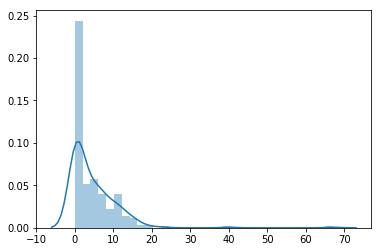

In [33]:
ax= sns.distplot(asample1)

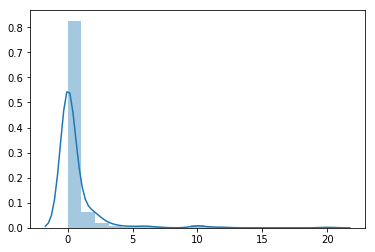

In [34]:
ax= sns.distplot(dsample1)
#skewed more towards 0

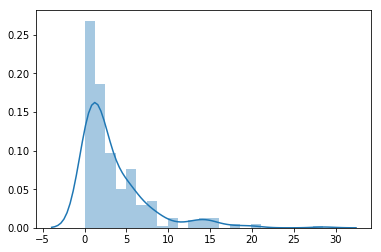

In [35]:
ax= sns.distplot(asample2)

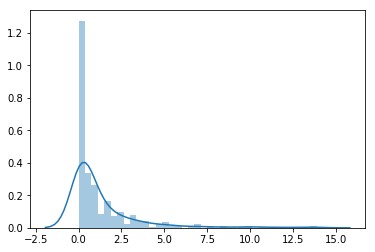

In [36]:
ax= sns.distplot(dsample2)

#T-Tests

In [37]:
accepted.describe()

,2,7,10,14
count,307.000000,307.000000,307.000000,307.000000
mean,5.904951,3.427899,4.605863,2038.859935
std,5.471485,4.120792,6.320242,7659.763941
min,0.000000,0.000000,0.000000,0.000000
25%,1.500000,0.750000,0.000000,0.000000
50%,4.460000,2.000000,3.000000,221.000000
75%,9.520000,5.000000,7.000000,1209.000000
max,28.000000,28.500000,67.000000,100000.000000


In [38]:
declined.describe()

,2,7,10,14
count,383.000000,383.000000,383.000000,383.000000
mean,3.839948,1.257924,0.631854,198.605744
std,4.337662,2.120481,1.900049,671.608839
min,0.000000,0.000000,0.000000,0.000000
25%,0.835000,0.125000,0.000000,0.000000
50%,2.210000,0.415000,0.000000,1.000000
75%,5.000000,1.500000,0.000000,67.000000
max,26.335000,13.875000,20.000000,5552.000000


In [0]:
from scipy.stats import ttest_1samp, ttest_ind

In [40]:
ttest_1samp(accepted[2], 5, nan_policy='omit')

Ttest_1sampResult(statistic=2.897938109990671, pvalue=0.004027499134412725)

In [41]:
ttest_1samp(accepted[2], 6, nan_policy='omit')

Ttest_1sampResult(statistic=-0.3043763373750156, pvalue=0.7610480832533749)

In [42]:
ttest_1samp(declined[2], 5, nan_policy='omit')

Ttest_1sampResult(statistic=-5.233849445205619, pvalue=2.745166855373887e-07)

In [43]:
ttest_1samp(declined[2], 6, nan_policy='omit')

Ttest_1sampResult(statistic=-9.74558551883549, pvalue=3.449992738600229e-20)

In [44]:
ttest_ind(accepted[2], declined[2], nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [45]:
ttest_ind(accepted[7], declined[7], nan_policy='omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

# Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## T Tests

I noticed that when I took a look at the desciptive stats of both accepted and declined that accepted sub group had higher means generally. This led me to conduct a t-test on column 2. While I am not aware of the context of column 2, I was able to make some concluions based on the t tests. below.

In [46]:
print('Test One: column 2 at 5 being accepted', ttest_1samp(accepted[2], 5, nan_policy='omit'))
print('Test Two: column 2 at 6 being accepted', ttest_1samp(accepted[2], 6, nan_policy='omit'))

Test One: column 2 at 5 being accepted Ttest_1sampResult(statistic=2.897938109990671, pvalue=0.004027499134412725)
Test Two: column 2 at 6 being accepted Ttest_1sampResult(statistic=-0.3043763373750156, pvalue=0.7610480832533749)


For test one the null hypothesis was you need at least a 5 in order to be accepted. I had to REJECT this null hypothesis. A value of 5 is probably not enough to be accepted.

For test two the null hypothesis was you need at least a 6 in order to be accepted. I FAILED TO REJECT the null hypothesis. A value of 6 can result in being accepted regularly


In [47]:
print('Test Four: column 2 at 5 being declined', ttest_1samp(declined[2], 5, nan_policy='omit'))
print('Test Five: column 2 at 6 being declined', ttest_1samp(declined[2], 6, nan_policy='omit'))

Test Four: column 2 at 5 being declined Ttest_1sampResult(statistic=-5.233849445205619, pvalue=2.745166855373887e-07)
Test Five: column 2 at 6 being declined Ttest_1sampResult(statistic=-9.74558551883549, pvalue=3.449992738600229e-20)


For test three, I wanted to take the inverse of test one. The null hypothesis is that a score of 5 will result in your being declined. I had to REJECT this hypothesis. A value of 5 does not usually result in being declined.

For test four, I wanted to check what happened when the value is increased to six. The null hypothesis is that 6 will result in your being declined. I had to REJECT this null hypothesis. This makes since as I had to fail to reject on test two.

## Chi Squared Tests

I ran a slew of Chi squared tests and found that columns 3, 4, 5,  11 are all correlated with being accepted or delined. I don't know how or why they are, only that their values differ from the expected values if everything was random.

## Challenges

This was by far the most challenging sprint for me. The hardest part was having very little context of the data set. All I can really say is that there are corraltions and relationships between the columns and the result of being accepted or declined. If I had more time I could dig into where those tipping points for each column are. However,  I'm not sure how useful that information would be without context. By not having context, I can't tap into my prior knowledge to generate what the possible causes could be. An odd side benefit to this, is that I also can't bring bias into my conclusions.